# EDA Project (TovTech) - Video Game reviews
### by Roman Fesunenko

In last decades, video games became part of life for most people, especially younger generations. Many companies are providing video games with various devices include PC, game console and mobile device. Also, they are provide games with different genres and with age category. In addition, You can play with different play modes, you can play singleplayer with playing alone and you can play in multiplayer with playing with another players around the world. Video games also advices various prices, but it not always correspond quality of graphics, soundtrack, story and how many time takes to finish completely the game. No less important know that user ratings that given by reviewers that have experience with playing game and recommend to others.

If you want to buy the game for yourself or/and childrens, you need examine which game most popular, which age group is suitable, which genre are you like, which platform you play games, if price is suitable quality and etc. Reviewer's user ratings can help with some point with choosing good video game.

Good question, let's ask and answer next questions.

- How do user ratings correlate with factors like price or completion time?
- Are there any significant differences in user ratings for games released on different platforms (PC vs. Console vs. Mobile) per year?
- Can we identify any patterns in user reviews based on the age group the game is targeted towards?
- How does the sentiment of user reviews (positive, negative, neutral) differ across different game genres?

## Data Importing

Importing data as reviews data.

Video game reviews dataset: https://www.kaggle.com/datasets/jahnavipaliwal/video-game-reviews-and-ratings

- 'Game Title' - title of the game 
- 'User Rating' - raiting given by users (ranging from 0 to 10)
- 'Age Group Targeted' - group of ages (Kids, Teens, Adults, All Ages) 
- 'Price' - price of video game (in USD)
- 'Platform' - game platform (PC, console or mobile)
- 'Requires Speical Device' - requires special hardware or accesories (like VR)
- 'Developer' - The company or studio responsible for developing the game (e.g., Nintendo, EA Sports, Epic Games)
- 'Publisher' - The company that publishes the game (e.g., Activision, Take-Two Interactive, Square Enix)
- 'Release Year' - public release year of the game
- 'Genre' - category of video game (e.g., Action, Adventure, Sports, Puzzle, RPG)
- 'Multiplayer' - multiplayer functionality is available (Yes or No)
- 'Game Length (Hours)' - average game length per hours to finish the game
- 'Graphics Quality' - graphics quality (Low, Medium, High, or Ultra)
- 'Soundtrack Quality' - soundtrack quality (Poor, Average, Good, or Excellent)
- 'Story Quality' - story quality (Poor, Average, Good, or Excellent)
- 'User Review Text' - user review text
- 'Game Mode' - game mode (Offline or Online)
- 'Min Numbers of Players' - minimum required number of players (e.g., 1, 2, 4)

### Import the packages

In [40]:
# Import revelant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### Load the data from dataset

In [41]:
# Import video_game_reviews.csv dataset from /kaggle/input/video-game-reviews-and-ratings
url = '/kaggle/input/video-game-reviews-and-ratings/video_game_reviews.csv'
reviews = pd.read_csv(url)

### Display first rows of data

In [42]:
# Display first rows of data
reviews.head()

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1


## Data Cleaning and Preprocessing

### Display information about data

In [43]:
# Display info about data
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Game Title               47774 non-null  object 
 1   User Rating              47774 non-null  float64
 2   Age Group Targeted       47774 non-null  object 
 3   Price                    47774 non-null  float64
 4   Platform                 47774 non-null  object 
 5   Requires Special Device  47774 non-null  object 
 6   Developer                47774 non-null  object 
 7   Publisher                47774 non-null  object 
 8   Release Year             47774 non-null  int64  
 9   Genre                    47774 non-null  object 
 10  Multiplayer              47774 non-null  object 
 11  Game Length (Hours)      47774 non-null  float64
 12  Graphics Quality         47774 non-null  object 
 13  Soundtrack Quality       47774 non-null  object 
 14  Story Quality         

**At result:**

*There multiple types of data columns in data:*

* Types of objects - 'Game Title', 'Platform', 'Requires Special Device', 'Developer', 'Publisher', 'Genre', 'Multiplayer', 'Graphics Quality', 'Soundtrack Quality', 'Story Quality', 'User Review Text' and 'Game Mode'

* Types of number (float64 and int64) - 'User Rating', 'Price', 'Game Length (Hours)', 'Release Year' and 'Min Number of Players'

### Change release year column to datetime type

In [44]:
# Changing column type "Release Year" to datetime type
reviews['Release Year'] = pd.to_datetime(reviews['Release Year'], format='%Y', errors='coerce')

# Display Release Year unique values
print(f"Release Years unique: {reviews['Release Year'].unique()}\n")

# Display data info
print(reviews.info())

# Display first data columns
reviews.head()

Release Years unique: <DatetimeArray>
['2015-01-01 00:00:00', '2012-01-01 00:00:00', '2022-01-01 00:00:00',
 '2017-01-01 00:00:00', '2020-01-01 00:00:00', '2010-01-01 00:00:00',
 '2013-01-01 00:00:00', '2018-01-01 00:00:00', '2011-01-01 00:00:00',
 '2014-01-01 00:00:00', '2016-01-01 00:00:00', '2023-01-01 00:00:00',
 '2021-01-01 00:00:00', '2019-01-01 00:00:00']
Length: 14, dtype: datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Game Title               47774 non-null  object        
 1   User Rating              47774 non-null  float64       
 2   Age Group Targeted       47774 non-null  object        
 3   Price                    47774 non-null  float64       
 4   Platform                 47774 non-null  object        
 5   Requires Special Device  47774 non-null  object        
 6 

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015-01-01,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015-01-01,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012-01-01,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015-01-01,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022-01-01,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1


**At result:**

Year column changed to datetime type.

### Check the rows and columns of data

In [45]:
print(f"Count of rows: {reviews.shape[0]} \nCount of columns: {reviews.shape[1]}")

Count of rows: 47774 
Count of columns: 18


**At result:**

It seems thats is 47774 rows and 18 columns that I am get in data.

### Check exist NA values

In [46]:
# Count NA values
print(reviews.shape)
reviews.isna().sum()

(47774, 18)


Game Title                 0
User Rating                0
Age Group Targeted         0
Price                      0
Platform                   0
Requires Special Device    0
Developer                  0
Publisher                  0
Release Year               0
Genre                      0
Multiplayer                0
Game Length (Hours)        0
Graphics Quality           0
Soundtrack Quality         0
Story Quality              0
User Review Text           0
Game Mode                  0
Min Number of Players      0
dtype: int64

**At result:**

It seems there haven't any NA data in reviews data.

### Check unique values in data in each column

In [47]:
# Checking unique values in data in each column
print(reviews.shape)
reviews.nunique()

(47774, 18)


Game Title                   40
User Rating                 392
Age Group Targeted            4
Price                      4001
Platform                      5
Requires Special Device       2
Developer                    10
Publisher                     9
Release Year                 14
Genre                        10
Multiplayer                   2
Game Length (Hours)         551
Graphics Quality              4
Soundtrack Quality            4
Story Quality                 4
User Review Text             12
Game Mode                     2
Min Number of Players         9
dtype: int64

**At result:**

It seems that at least one column doesn't have unique values that equal data rows

### Checking data for duplication

In [48]:
# Checking data for duplication
print(f"Number of duplicates: {reviews.duplicated().sum()}")
reviews[reviews.duplicated()].head()

Number of duplicates: 0


,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players


**At result:**

It seems there not duplications in data.

### Add review index to data

In [49]:
# Add an index column to the DataFrame
reviews['Review ID'] = range(1, len(reviews) + 1)

# Set 'index' as the new index
reviews = reviews.set_index('Review ID')

# Display the first few rows
reviews.head()

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
Review ID,,,,,,,,,,,,,,,,,,
1,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015-01-01,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
2,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015-01-01,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
3,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012-01-01,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
4,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015-01-01,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
5,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022-01-01,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1


**At result:**

Added review index column 'Review ID'.

### Detecting of outliers

In [50]:
col = 'Game Length (Hours)'

q1  = reviews[col].quantile(.25)
q3  = reviews[col].quantile(.75)
iqr = q3-q1
right_bound = reviews[col] < (q3 + iqr * 1.5)
left_bound  = reviews[col] > (q1 - iqr * 1.5)

reviews = reviews[left_bound & right_bound]
reviews

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
Review ID,,,,,,,,,,,,,,,,,,
1,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015-01-01,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
2,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015-01-01,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
3,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012-01-01,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
4,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015-01-01,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
5,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022-01-01,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47770,Minecraft,41.6,All Ages,49.11,PlayStation,Yes,Valve,Innersloth,2016-01-01,Party,No,56.7,Low,Excellent,Average,"Amazing game, but the graphics could be better.",Online,4
47771,The Legend of Zelda: Breath of the Wild,24.2,Kids,31.69,Xbox,Yes,Valve,Electronic Arts,2023-01-01,Strategy,No,29.7,High,Good,Excellent,"Solid game, but the graphics could be better.",Offline,1
47772,Animal Crossing: New Horizons,26.7,All Ages,44.90,PlayStation,Yes,Game Freak,Square Enix,2018-01-01,Sports,No,8.2,Low,Poor,Good,"Great game, but the gameplay is amazing.",Offline,5


In [51]:
col = 'Price'

q1  = reviews[col].quantile(.25)
q3  = reviews[col].quantile(.75)
iqr = q3-q1
price_filter  = reviews[col] < (q3 + iqr * 1.5)

reviews = reviews[price_filter]
reviews

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
Review ID,,,,,,,,,,,,,,,,,,
1,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015-01-01,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
2,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015-01-01,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
3,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012-01-01,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
4,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015-01-01,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
5,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022-01-01,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47770,Minecraft,41.6,All Ages,49.11,PlayStation,Yes,Valve,Innersloth,2016-01-01,Party,No,56.7,Low,Excellent,Average,"Amazing game, but the graphics could be better.",Online,4
47771,The Legend of Zelda: Breath of the Wild,24.2,Kids,31.69,Xbox,Yes,Valve,Electronic Arts,2023-01-01,Strategy,No,29.7,High,Good,Excellent,"Solid game, but the graphics could be better.",Offline,1
47772,Animal Crossing: New Horizons,26.7,All Ages,44.90,PlayStation,Yes,Game Freak,Square Enix,2018-01-01,Sports,No,8.2,Low,Poor,Good,"Great game, but the gameplay is amazing.",Offline,5


**At result:**

It seems that no outliers.

## Exploratory Data Analysis (EDA)

### Describe summary statistic in datacamp:

In [52]:
# Summary statistics
reviews[['User Rating', 'Price', 'Game Length (Hours)', 'Min Number of Players']].describe()

,User Rating,Price,Game Length (Hours),Min Number of Players
count,47774.000000,47774.000000,47774.000000,47774.000000
mean,29.719329,39.951371,32.481672,5.116758
std,7.550131,11.520342,15.872508,2.769521
min,10.100000,19.990000,5.000000,1.000000
25%,24.300000,29.990000,18.800000,3.000000
50%,29.700000,39.845000,32.500000,5.000000
75%,35.100000,49.957500,46.300000,7.000000
max,49.500000,59.990000,60.000000,10.000000


**At result:**

* We can see count, mean, std, min, max and quartiles in numerical columns.
* There in every columns equal 47774 values
* User Rating - Average raiting is 29.7, minimal rating is 10.1 and maximal rating is 49.5
* Price - Average price of the game costs 39.95 USD, minimal cost of the game is 19.99 USD and maximal cost of the game is 59.99 USD
* Game Length (Hours) - Average game hours are 32.48 hours, minimal game hours are 5 hours and maximal game hours are 60 hours
* Min Numbers of Players - Average number of players is 5 players, minimal number of platers is 1 player and maximal number of player is 10 players.

### Count every categorical column by reviewers per unique with counting any unique:

In [53]:
# Count reviews and group by unique value for each column
print(f"\n{reviews['Game Title'].value_counts()}\nThere have {reviews['Game Title'].nunique()} games")
print(f"\n{reviews['Age Group Targeted'].value_counts()}\nThere have {reviews['Age Group Targeted'].nunique()} age groups")
print(f"\n{reviews['Platform'].value_counts()}\nThere have {reviews['Platform'].nunique()} platforms")
print(f"\n{reviews['Requires Special Device'].value_counts()}\nThere have {reviews['Requires Special Device'].nunique()} special device requirements")
print(f"\n{reviews['Developer'].value_counts()}\nThere have {reviews['Developer'].nunique()} developer companies")
print(f"\n{reviews['Publisher'].value_counts()}\nThere have {reviews['Publisher'].nunique()} publisher companies")
print(f"\n{reviews['Release Year'].value_counts()}\nThere have {reviews['Release Year'].nunique()} release years")
print(f"\n{reviews['Genre'].value_counts()}\nThere have {reviews['Genre'].nunique()} genres")
print(f"\n{reviews['Multiplayer'].value_counts()}\nThere have {reviews['Multiplayer'].nunique()} multiplayer availability")
print(f"\n{reviews['Graphics Quality'].value_counts()}\nThere have {reviews['Graphics Quality'].nunique()} graphics qualities")
print(f"\n{reviews['Soundtrack Quality'].value_counts()}\nThere have {reviews['Soundtrack Quality'].nunique()} soundtrack qualities")
print(f"\n{reviews['Story Quality'].value_counts()}\nThere have {reviews['Story Quality'].nunique()} story qualities")
print(f"\n{reviews['User Review Text'].value_counts()}\nThere have {reviews['User Review Text'].nunique()} user review texts")
print(f"\n{reviews['Game Mode'].value_counts()}\nThere have {reviews['Game Mode'].nunique()} game modes")


Game Title
Pokémon Scarlet & Violet                   1274
Minecraft                                  1265
FIFA 24                                    1247
Tomb Raider (2013)                         1245
Street Fighter V                           1245
Super Smash Bros. Ultimate                 1235
Fall Guys                                  1232
Hitman 3                                   1229
Tetris                                     1224
1000-Piece Puzzle                          1222
Kingdom Hearts III                         1220
Half-Life: Alyx                            1219
Spelunky 2                                 1219
The Witcher 3: Wild Hunt                   1216
Stardew Valley                             1209
Tekken 7                                   1209
Call of Duty: Modern Warfare 2             1208
Animal Crossing: New Horizons              1208
Pillars of Eternity II: Deadfire           1207
Overwatch 2                                1203
Portal 2                    

**At result:**

* We can see that number of reviews divided by various categories.
* We can see that we have 40 games.
* We can see that we have 4 age groups.
* We can see that we have 5 platforms.
* We can see that we have two boolean variants for special device requirements.
* We can see that we have 10 developer companies.
* We can see that we have 9 publisher compaines.
* We can see that we have 14 release years.
* We can see that we have 10 genres.
* We can see that we have two boolean variants for multiplayer.
* We can see that we have 4 types of qualities (include story, soundtrack and graphical).
* We can see that we have 12 user reviews texts.
* We can see that we have two game modes (Online or Offline).

### Sort games by reviews and then visualize it with barplot.

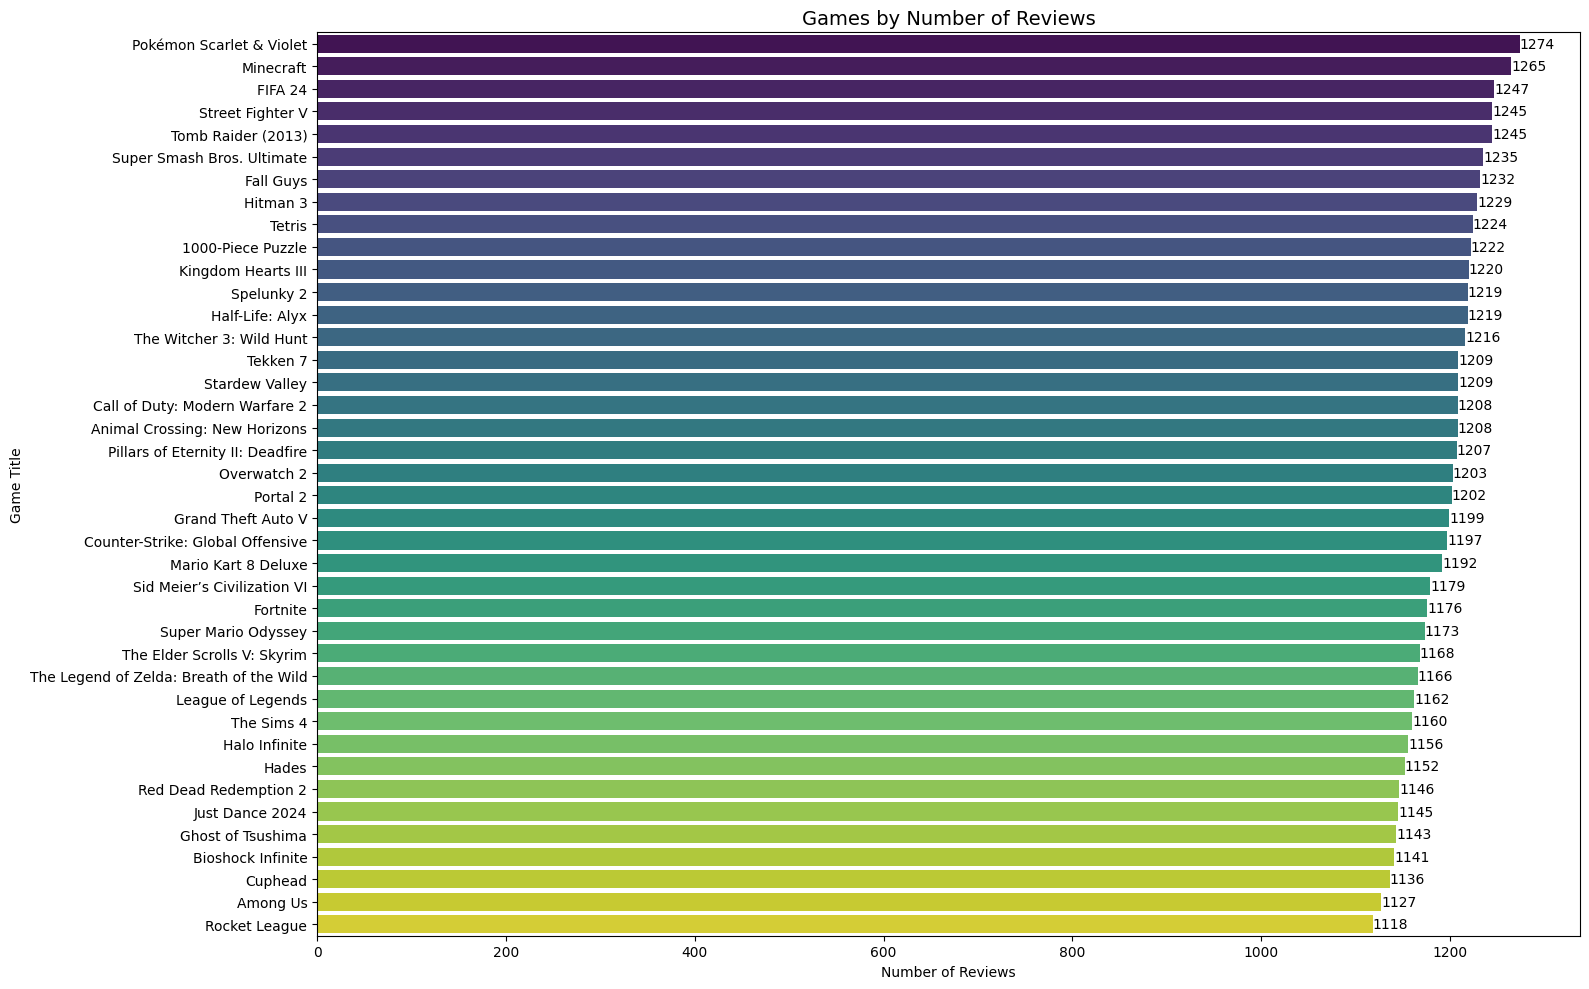

In [54]:
# Group by 'Game Title' and count reviews
game_review_counts = reviews.groupby('Game Title').size().reset_index(name='Review Count')

# Sort by review count in descending order
sorted_review_counts = game_review_counts.sort_values(by='Review Count', ascending=False)

# Visualize the games by review count with bar plot
plt.figure(figsize=(16, 10))
sns.barplot(data=sorted_review_counts, x='Review Count', y='Game Title', palette='viridis')

for index, value in enumerate(sorted_review_counts['Review Count']):
    plt.text(value, index, str(value), fontsize=10, va='center')

plt.title('Games by Number of Reviews', fontsize=14)
plt.xlabel('Number of Reviews')
plt.ylabel('Game Title')
plt.tight_layout()
plt.show()

**At result:**
* Most popular game is 'Pokemon Skarlet & Violet' with 1274 reviewers.
* TOP-5 popular games are 'Pokemon Skarlet & Violet', 'Minecraft', 'FIFA 24', 'Street Fighter V' and 'Tomb Raider (2013)'
* Least popular game is 'Rocket League' with 1118 reviewers.

### Sort genres, platforms and age groups by reviews and then visualize it with barplot and pie plot.

#### Sort genres by reviews and then visualize it with barplot and pie plot.

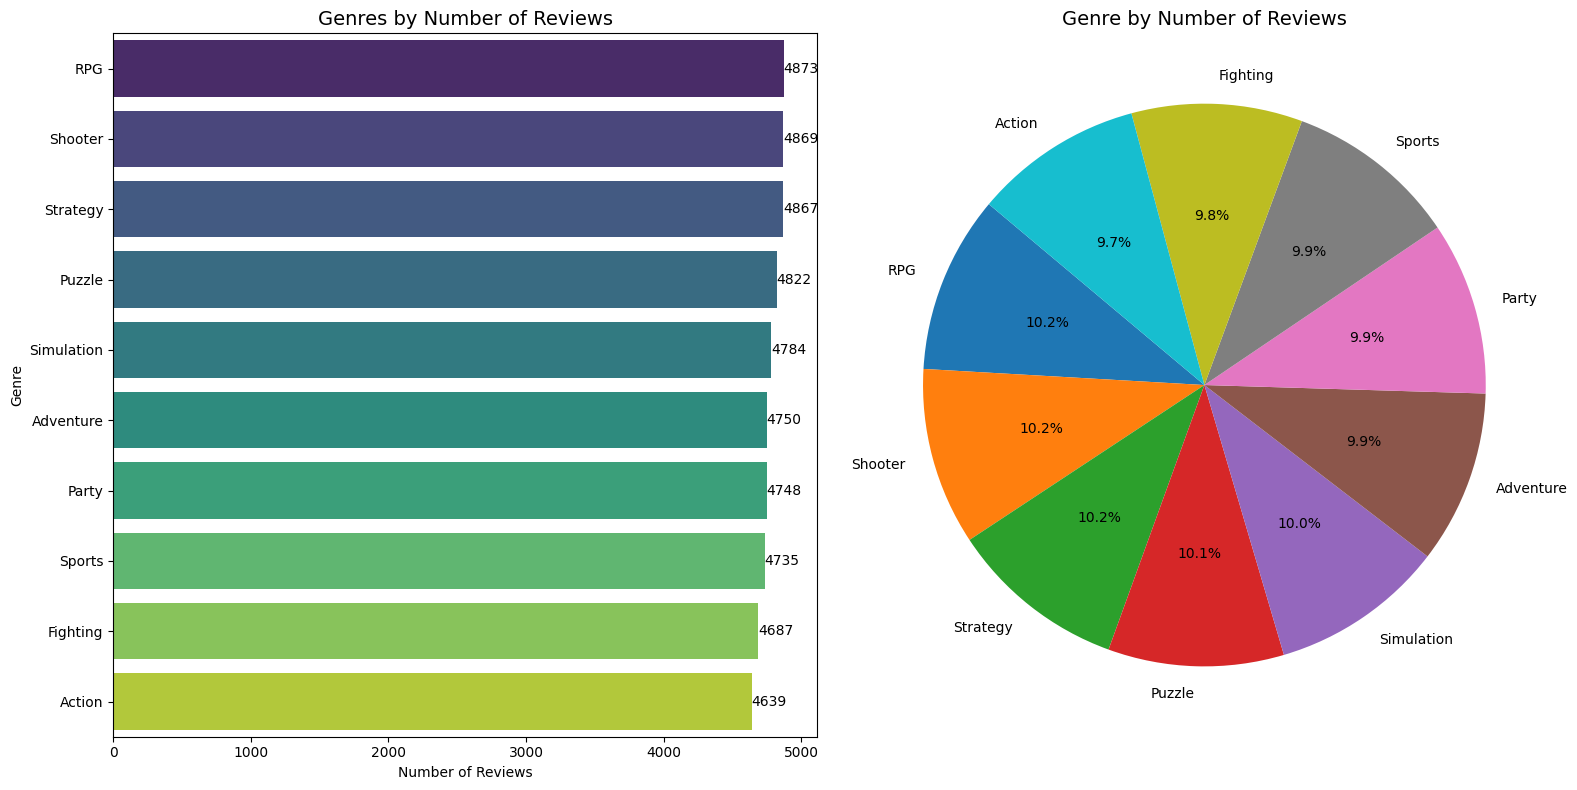

In [55]:
# Group by 'Genre' and count reviews
genre_review_counts = reviews.groupby('Genre').size().reset_index(name='Review Count')

# Sort by review count in descending order
sorted_review_counts = genre_review_counts.sort_values(by='Review Count', ascending=False)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

# Bar plot on the first subplot
sns.barplot(
    data=sorted_review_counts,
    x='Review Count',
    y='Genre',
    palette='viridis',
    ax=axes[0]
)

# Add text labels to the bar plot
for index, value in enumerate(sorted_review_counts['Review Count']):
    axes[0].text(value, index, str(value), fontsize=10, va='center')

# Customize the bar plot
axes[0].set_title('Genres by Number of Reviews', fontsize=14)
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Genre')

# Pie chart on the second subplot
axes[1].pie(
    sorted_review_counts['Review Count'],
    labels=sorted_review_counts['Genre'],
    autopct='%1.1f%%',
    startangle=140
)

# Customize the pie chart
axes[1].set_title('Genre by Number of Reviews', fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

**At result:**
* Most popular genre is RPG with 4873 reviewers (9.7% of reviewers).
* TOP-5 popular genres are RPG, Shooter, Strategy, Puzzle and Simulation.
* Least popular genre is Action with 4639 reviewers (9.7% of reviewers).

#### Sort game platforms by reviews and then visualize it with barplot and pie plot.

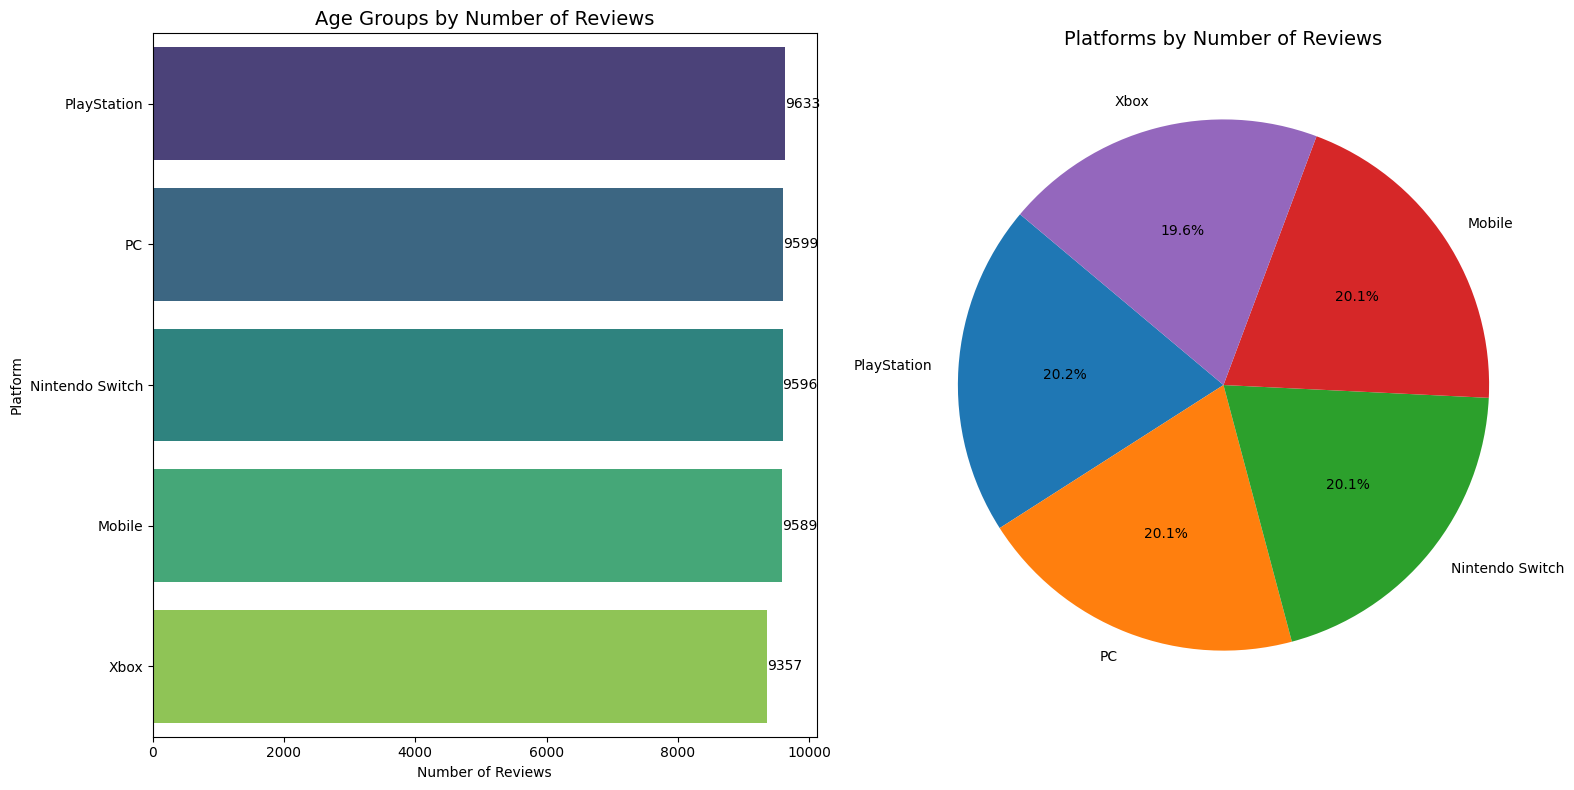

In [56]:
# Group by 'Platform' and count reviews
platform_review_counts = reviews.groupby('Platform').size().reset_index(name='Review Count')

# Sort by review count in descending order
sorted_review_counts = platform_review_counts.sort_values(by='Review Count', ascending=False)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

# Bar plot on the first subplot
sns.barplot(
    data=sorted_review_counts,
    x='Review Count',
    y='Platform',
    palette='viridis',
    ax=axes[0]
)

# Add text labels to the bar plot
for index, value in enumerate(sorted_review_counts['Review Count']):
    axes[0].text(value, index, str(value), fontsize=10, va='center')

# Customize the bar plot
axes[0].set_title('Age Groups by Number of Reviews', fontsize=14)
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Platform')

# Pie chart on the second subplot
axes[1].pie(
    sorted_review_counts['Review Count'],
    labels=sorted_review_counts['Platform'],
    autopct='%1.1f%%',
    startangle=140
)

# Customize the pie chart
axes[1].set_title('Platforms by Number of Reviews', fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

**At result:**
* Most popular platform is Playstation with 9633 reviewers (20.2% of reviewers).
* TOP-5 popular platforms are PlayStation, PC, Nintendo Switch, Mobile and Xbox.
* Least popular platform is Xbox with 9357 reviewers (19.6% of reviewers).

#### Sort game age group targeted by reviews and then visualize it with barplot and pie plot by ordered groups All Ages, Kids, Teens, Adults.

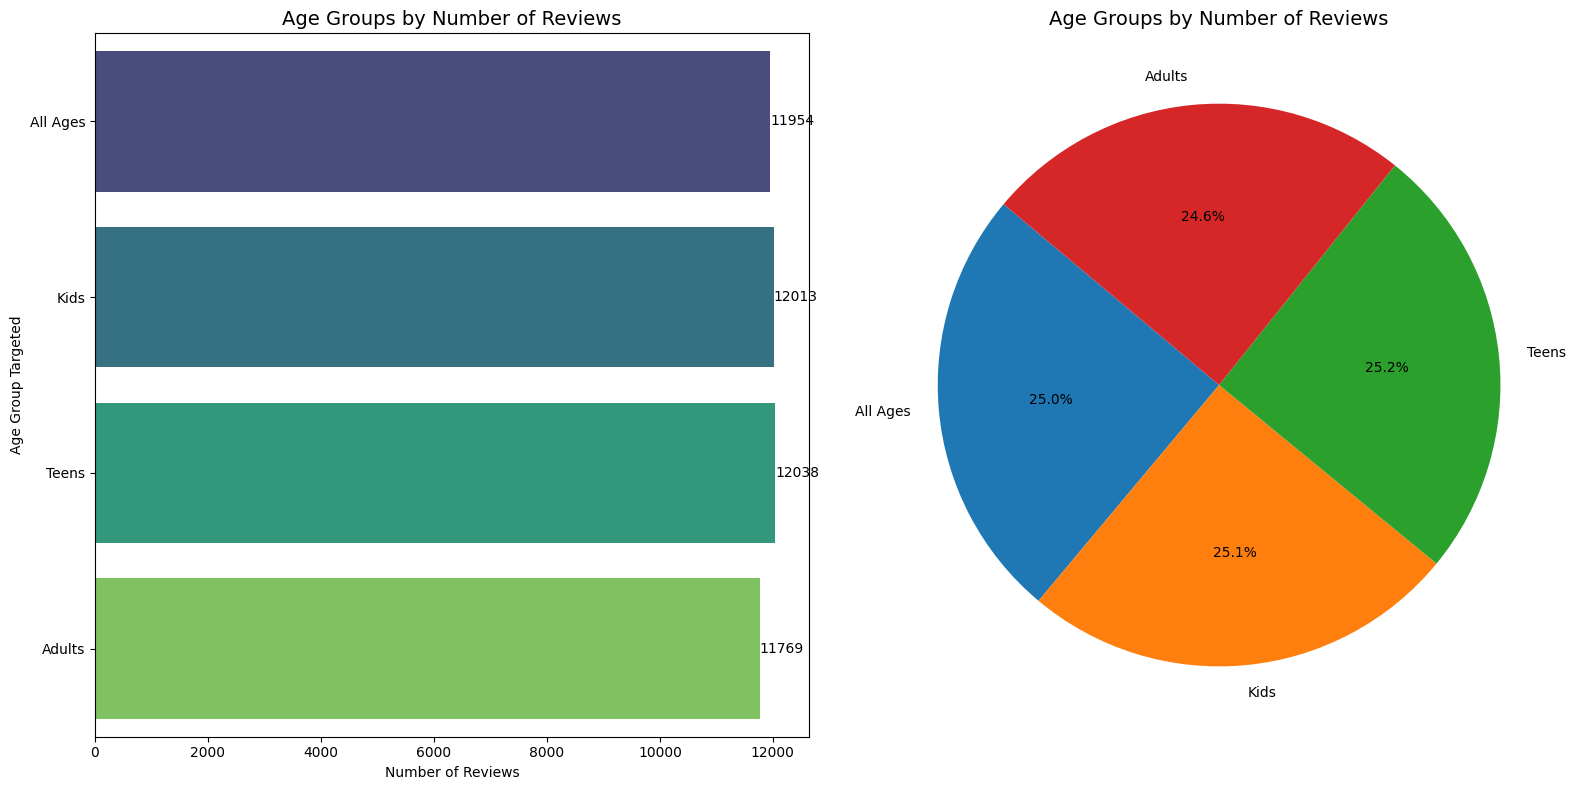

In [57]:
# Define a custom order for 'Age Group Targeted'
age_order = ['All Ages', 'Kids', 'Teens', 'Adults']
reviews['Age Group Targeted'] = pd.Categorical(reviews['Age Group Targeted'], categories=age_order, ordered=True)

# Group by 'Age Group Targeted' and count reviews
age_group_review_counts = reviews.groupby('Age Group Targeted').size().reset_index(name='Review Count')

# Sort by the custom order
sorted_review_counts = age_group_review_counts.sort_values(by='Age Group Targeted')

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

# Bar plot on the first subplot
sns.barplot(
    data=sorted_review_counts,
    x='Review Count',
    y='Age Group Targeted',
    palette='viridis',
    ax=axes[0]
)

# Add text labels to the bar plot
for index, value in enumerate(sorted_review_counts['Review Count']):
    axes[0].text(value, index, str(value), fontsize=10, va='center')

# Customize the bar plot
axes[0].set_title('Age Groups by Number of Reviews', fontsize=14)
axes[0].set_xlabel('Number of Reviews')
axes[0].set_ylabel('Age Group Targeted')

# Pie chart on the second subplot
axes[1].pie(
    sorted_review_counts['Review Count'],
    labels=sorted_review_counts['Age Group Targeted'],
    autopct='%1.1f%%',
    startangle=140
)

# Customize the pie chart
axes[1].set_title('Age Groups by Number of Reviews', fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

**At result:**
* Most popular age group is Teens with 12038 reviewers (25.2% of reviewers).
* TOP popular age groups are Teens, Kids, All Ages and Adults.
* Least popular age group is A with 11769 reviewers (24.6% of reviewers).

### Use histograms and KDE plots to visualize distributions of Price, User Ratings, Game Length (Hours) and Release Year.

#### Disribution of User Ratings

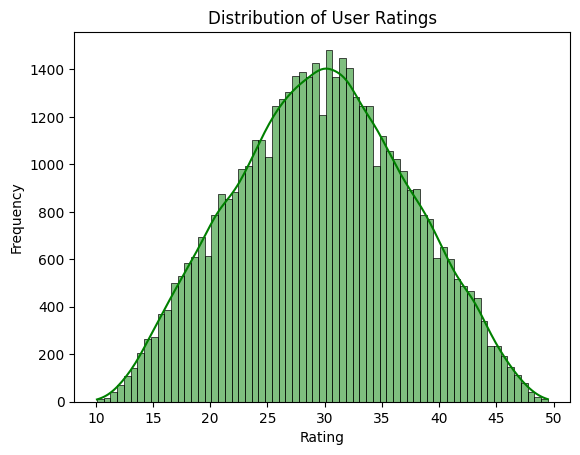

In [58]:
# Display histoplot of disribution of user ratings
sns.histplot(reviews['User Rating'], kde=True, color='green')
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**At result:**
* Average rating of reviews the games is 30.
* Most popular reviews give rating of 30.
* Least popular reviews give rating below to 15 or above from 45.

#### Disribution of Prices

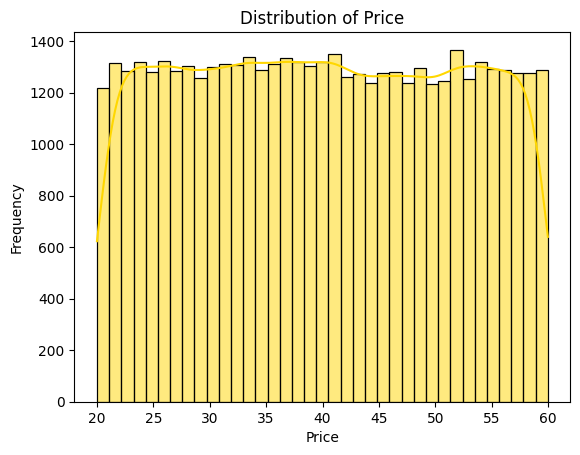

In [59]:
# Display histoplot of disribution of prices
sns.histplot(reviews['Price'], kde=True, color='gold')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**At result:**
* Average price by reviews the games is 40 USD.
* Most popular reviews reviewed games that cost 52 USD.
* Least popular reviews reviewed games below to 25 USD or above 55 USD.

#### Disribution of Game Length (Hours)

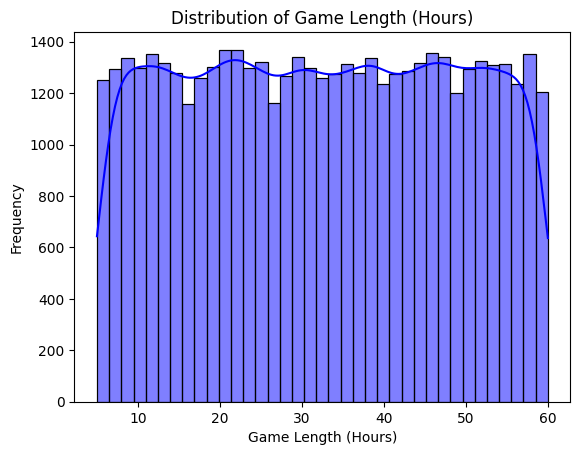

In [60]:
# # Display histoplot of disribution of game length
sns.histplot(reviews['Game Length (Hours)'], kde=True, color='blue')
plt.title('Distribution of Game Length (Hours)')
plt.xlabel('Game Length (Hours)')
plt.ylabel('Frequency')
plt.show()

**At result:**
* Average game hour is 35 hours.
* Most popular reviews spent in average 35 hours.
* Least popular reviews spent below to 10 hours or above 55 hours.

#### Disribution of Release Year

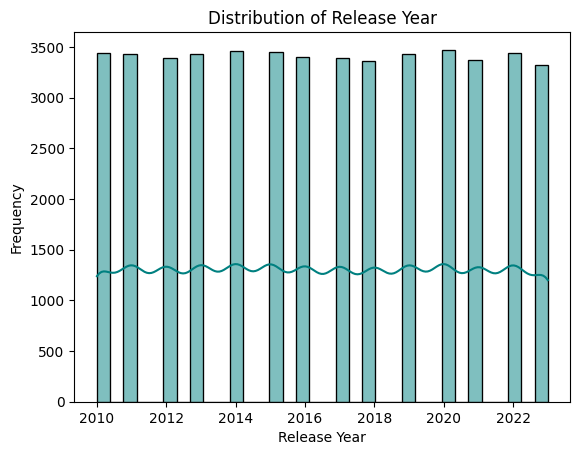

In [61]:
# # Display histoplot of disribution of game length
sns.histplot(reviews['Release Year'], kde=True, color='teal')
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

**At result:**
* Number of game reviews of release year are same.
* Average number reviews are 3500 reviews

### Compare User Ratings and Price across games by using boxplot:
#### User Ratings vs Game comprassion and Game vs Platform comprassion

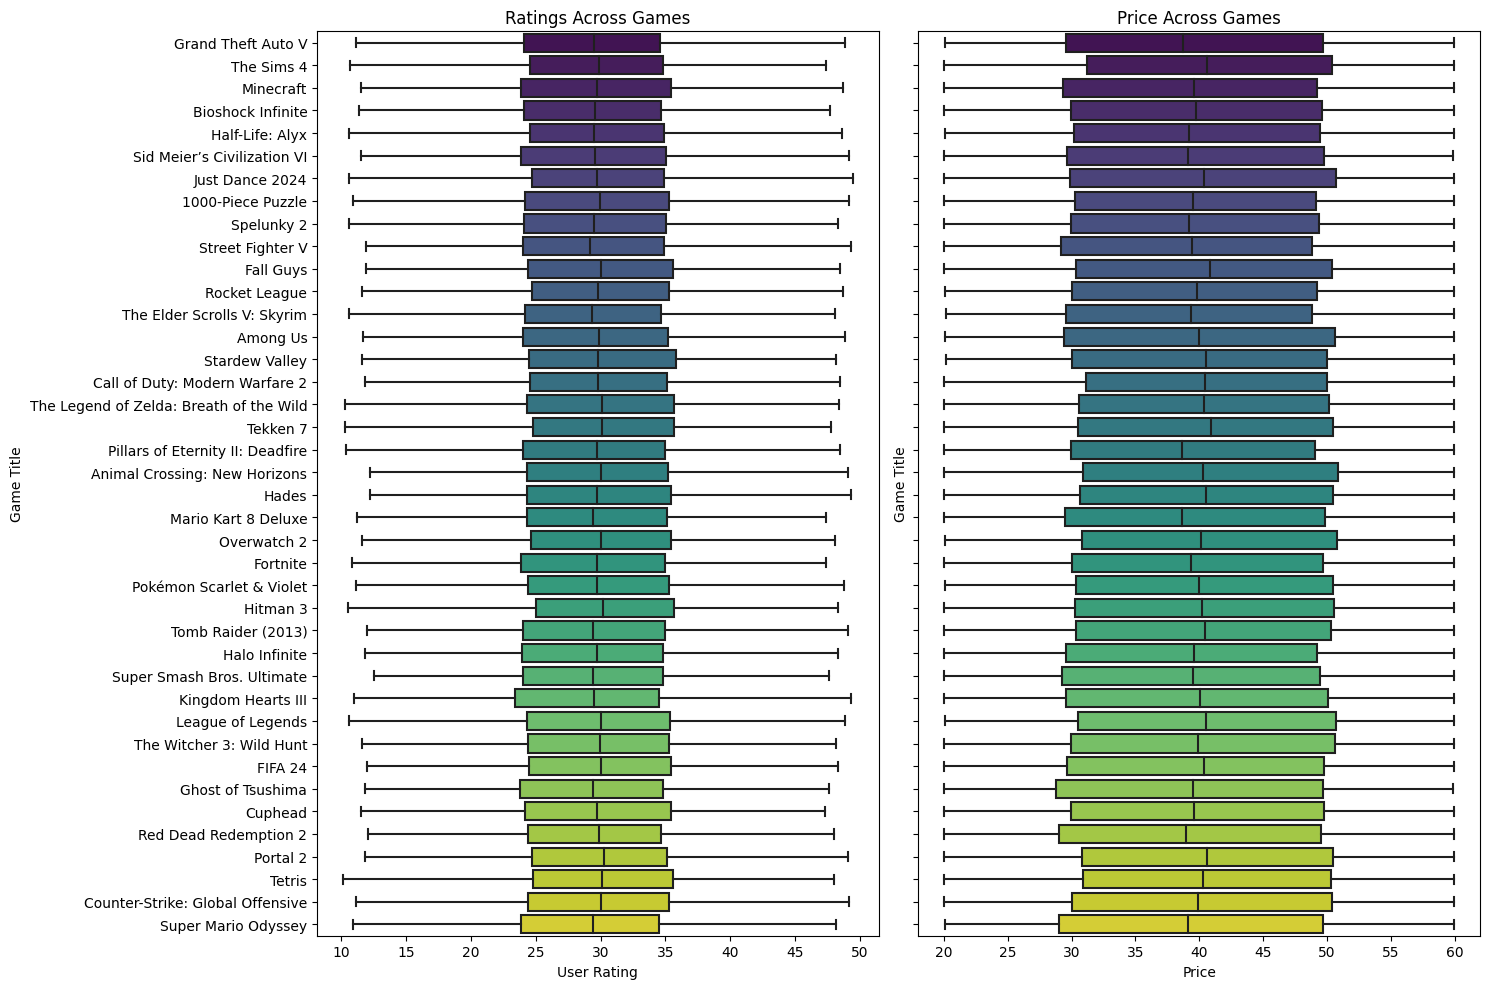

In [62]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 10), sharey=True)  # 1 row, 2 columns

# Boxplot of user ratings vs game title
sns.boxplot(ax=axes[0], x='User Rating', y='Game Title', data=reviews, palette='viridis')
axes[0].set_title('Ratings Across Games')
axes[0].tick_params(axis='x')
axes[0].tick_params(axis='y')

# Boxplot of price vs game title
sns.boxplot(ax=axes[1], x='Price', y='Game Title', data=reviews, palette='viridis')
axes[1].set_title('Price Across Games')
axes[1].tick_params(axis='x')
axes[1].tick_params(axis='y')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

**At result:**
* Average rating games is 30.
* Average price of games is 40 USD.
* Minimal rating games is 10.
* Minimal price of games is 20 USD.
* Maximal rating games is 50.
* Maximal price of games is 60 USD.

### Compare User Ratings and Price across genres by using boxplot:
#### User Ratings vs Genre comprassion and Price vs Genre comprassion

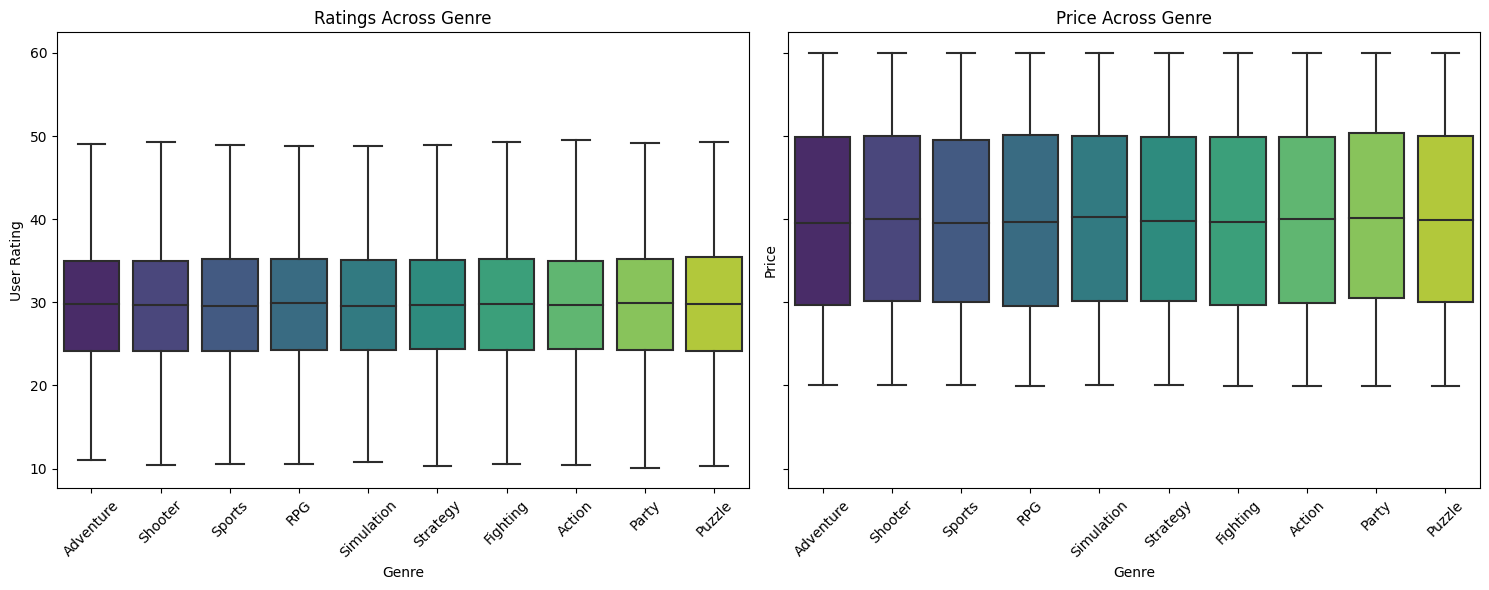

In [63]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)  # 1 row, 2 columns

# Boxplot of user ratings vs genres
sns.boxplot(ax=axes[0], x='Genre', y='User Rating', data=reviews, palette='viridis')
axes[0].set_title('Ratings Across Genre')
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y')

# Boxplot of price vs genres
sns.boxplot(ax=axes[1], x='Genre', y='Price', data=reviews, palette='viridis')
axes[1].set_title('Price Across Genre')
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

**At result:**
* Average rating games by genre is 30.
* Average price of games by genre is 40 USD.
* Minimal rating games by genre is 10.
* Minimal price of games by genre is 20 USD.
* Maximal rating games by genre is 50.
* Maximal price of games by genre is 60 USD.

### Compare User Ratings and Price across platforms by using boxplot:
#### User Ratings vs Platform comprassion and Price vs Platform comprassion

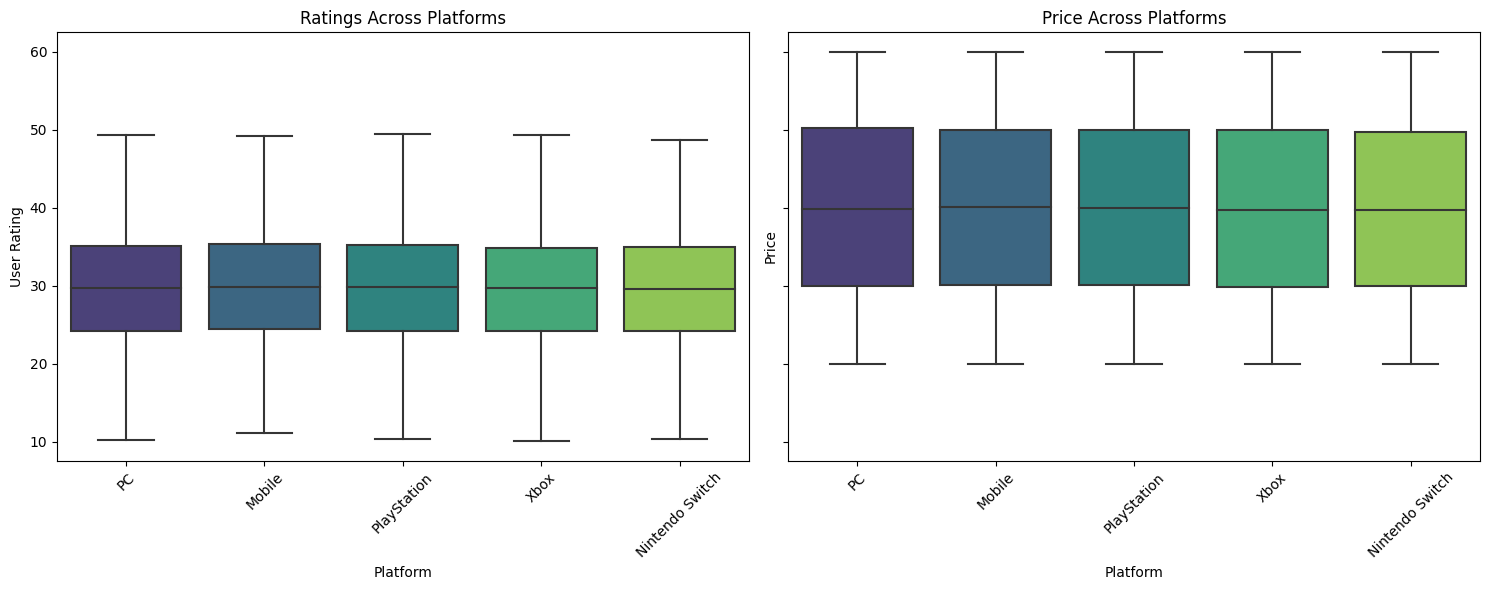

In [64]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)  # 1 row, 2 columns

# Boxplot of user ratings vs platforms
sns.boxplot(ax=axes[0], x='Platform', y='User Rating', data=reviews, palette='viridis')
axes[0].set_title('Ratings Across Platforms')
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y')

# Boxplot of price vs platforms
sns.boxplot(ax=axes[1], x='Platform', y='Price', data=reviews, palette='viridis')
axes[1].set_title('Price Across Platforms')
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

**At result:**
* Average rating games by platform is 30.
* Average price of games by platform is 40 USD.
* Minimal rating games by platform is 10.
* Minimal price of games by platform is 20 USD.
* Maximal rating games by platform is 50.
* Maximal price of games by platform is 60 USD.

### Compare User Ratings and Price across age group by using boxplot:
#### User Ratings vs Age Group comprassion and Price vs Age Group comprassion by order groups All ages, Kids, Teens, Adults.

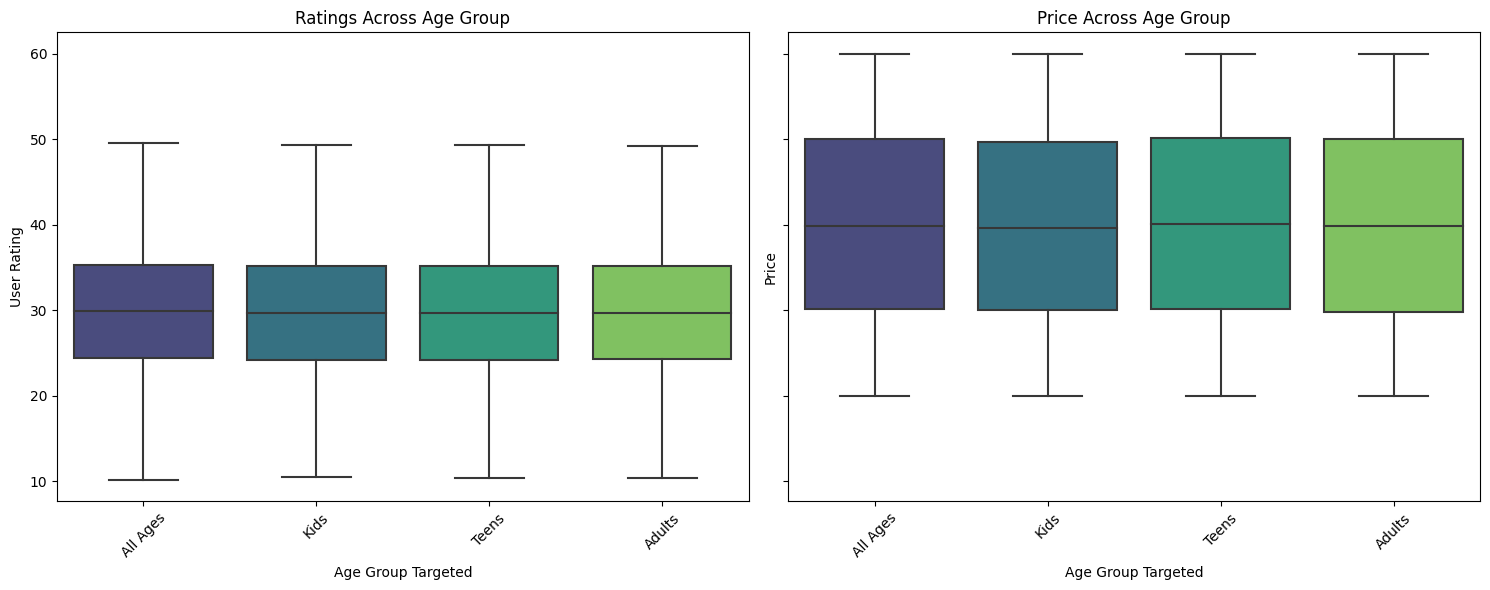

In [65]:
# Ensure the 'Age Group Targeted' column has the desired order
age_order = ['All Ages', 'Kids', 'Teens', 'Adults']
reviews['Age Group Targeted'] = pd.Categorical(reviews['Age Group Targeted'], categories=age_order, ordered=True)

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)  # 1 row, 2 columns

# Boxplot of user ratings vs age group
sns.boxplot(ax=axes[0], x='Age Group Targeted', y='User Rating', data=reviews, palette='viridis')
axes[0].set_title('Ratings Across Age Group')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot of price vs age group
sns.boxplot(ax=axes[1], x='Age Group Targeted', y='Price', data=reviews, palette='viridis')
axes[1].set_title('Price Across Age Group')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

### Check relationships between numerical variables using a heatmap

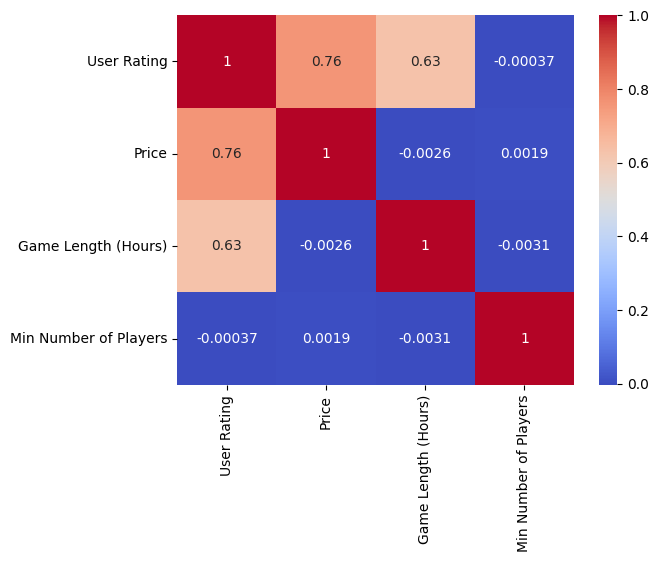

In [66]:
correlation_matrix = reviews[['User Rating', 'Price', 'Game Length (Hours)', 'Min Number of Players']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

**At result:**
* User rating and price some association each other.
* User rating, price and game length have littely association.
* Min numbers of played doesnt have assosiation of other numeric columns.

### Visualize distribution games by Genre, Platform and Age Group by Release year with bar plot.

#### Visualize distribution games by genre by Release year with bar plot.

<Figure size 1400x700 with 0 Axes>

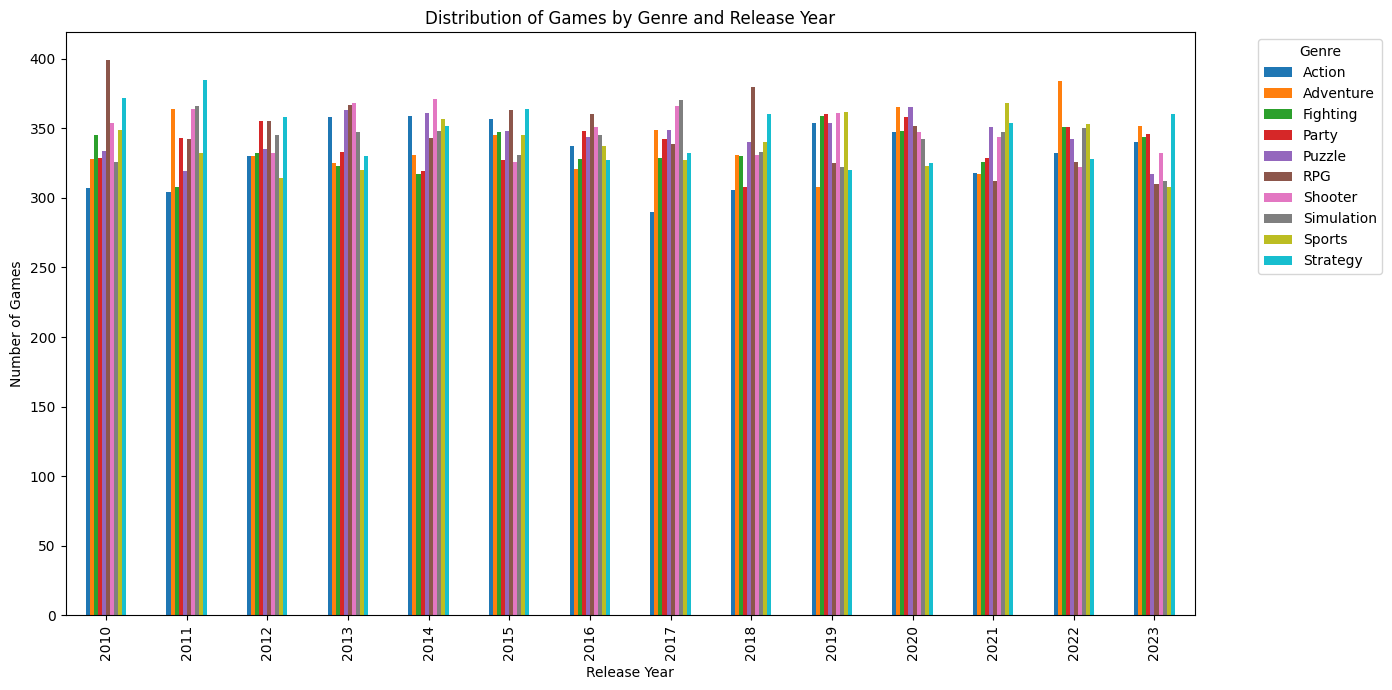

In [67]:
# Group and prepare the data
grouped_data = reviews.groupby(['Release Year', 'Genre', 'Platform', 'Age Group Targeted']).size().reset_index(name='Count')
grouped_data['Year'] = grouped_data['Release Year'].dt.year

# Pivot for Genre
genre_pivot = grouped_data.pivot_table(index='Year', columns='Genre', values='Count', aggfunc='sum', fill_value=0)

# Plot for Genre
plt.figure(figsize=(14, 7))
genre_pivot.plot(kind='bar', stacked=False, figsize=(14, 7))
plt.title('Distribution of Games by Genre and Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Games')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**At result:**
* Popularity for each genre is changes every year.
* Most reviewed genre in 2010 is RPG. Least reviewed genre in 2010 is Action.
* Most reviewed genre in 2015 is Strategy. Least reviewed genre in 2015 is Shooter.
* Most reviewed genre in 2018 is RPG. Least reviewed genre in 2018 is Action.
* Most reviewed genres in 2020 are Adventure and Puzzle. Least reviewed genre in 2020 is Sports.
* Most reviewed genre in 2023 is Strategy. Least reviewed genres in 2023 are Sports and RPG.

#### Visualize distribution games by platform by Release year with bar plot.

<Figure size 1400x700 with 0 Axes>

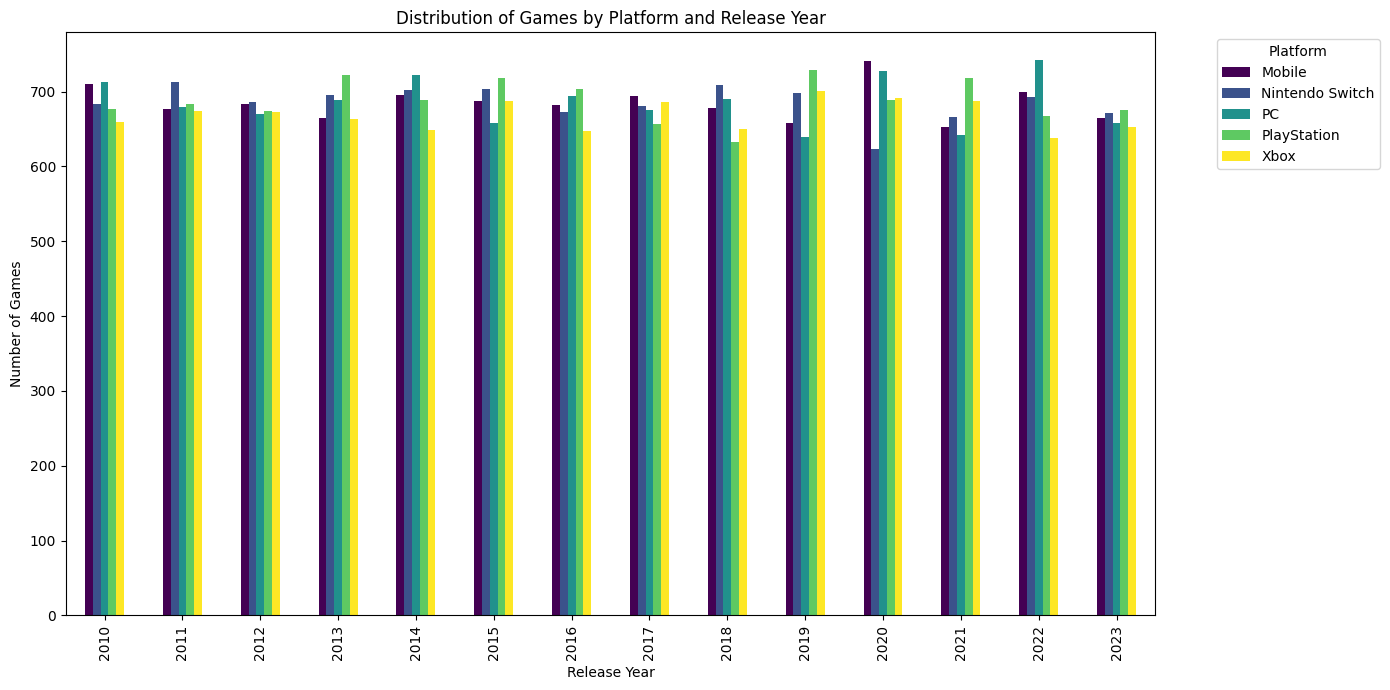

In [68]:
# Pivot for Platform
platform_pivot = grouped_data.pivot_table(index='Year', columns='Platform', values='Count', aggfunc='sum', fill_value=0)

# Plot for Platform
plt.figure(figsize=(14, 7))
platform_pivot.plot(kind='bar', stacked=False, figsize=(14, 7), colormap='viridis')
plt.title('Distribution of Games by Platform and Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Games')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**At result:**
* Popularity for each platform is changes every year.
* Most reviewed platform in 2010 is PC. Least reviewed platform in 2010 is Xbox.
* Most reviewed platform in 2015 is PlayStation. Least reviewed platform in 2015 is PC.
* Most reviewed platform in 2018 is Nintendo Switch. Least reviewed platform in 2018 is PlayStation.
* Most reviewed platform in 2020 is Mobile. Least reviewed platform in 2020 is Nintendo Switch.
* Most reviewed platform in 2023 is PlayStation. Least reviewed platform in 2023 is Xbox.

#### Visualize distribution games by age group by Release year with bar plot.

<Figure size 1400x700 with 0 Axes>

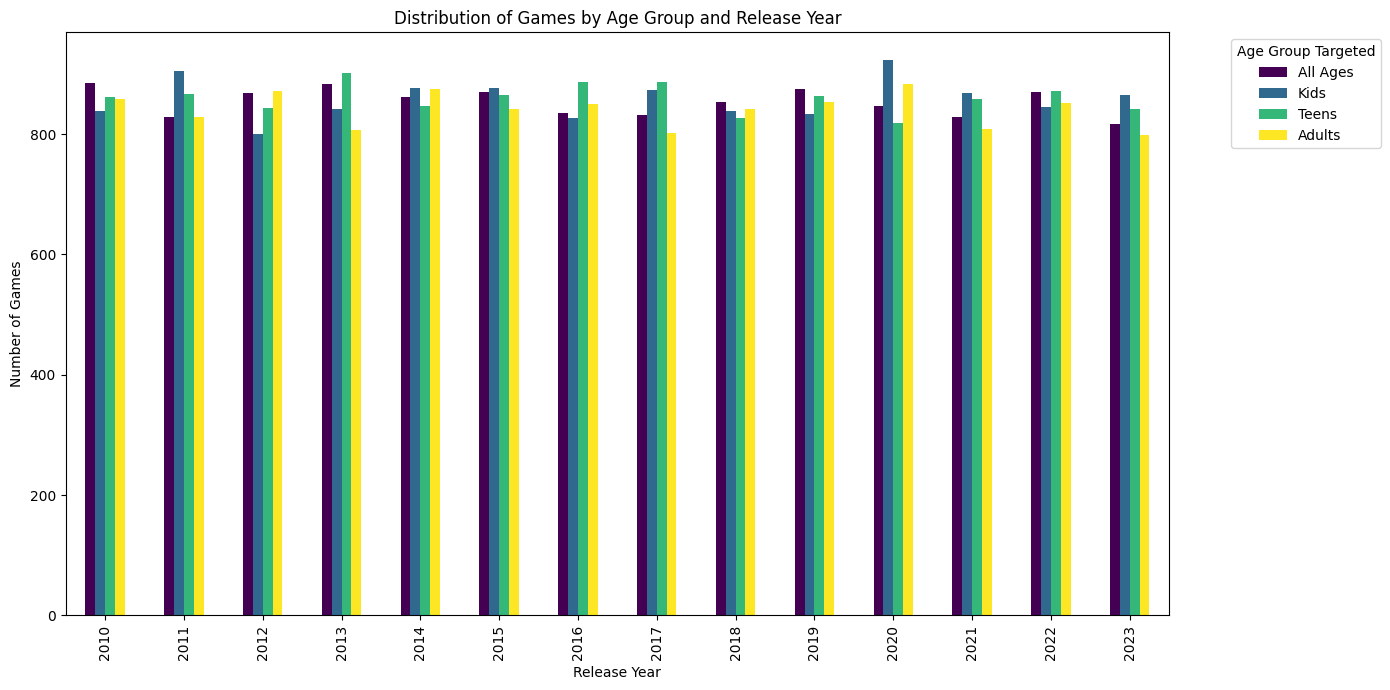

In [69]:

# Pivot for Age Group
age_group_pivot = grouped_data.pivot_table(index='Year', columns='Age Group Targeted', values='Count', aggfunc='sum', fill_value=0)

# Plot for Age Group
plt.figure(figsize=(14, 7))
age_group_pivot.plot(kind='bar', stacked=False, figsize=(14, 7), colormap='viridis')
plt.title('Distribution of Games by Age Group and Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Games')
plt.legend(title='Age Group Targeted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**At result:**
* Popularity for each age group is changes every year.
* Most reviewed age group in 2010 is All Ages. Least reviewed age group in 2010 is Kids.
* Most reviewed age group in 2015 is Kids. Least reviewed age group in 2015 is Adults.
* Most reviewed age group in 2018 is All Ages. Least reviewed age group in 2015 is Teens.
* Most reviewed age group in 2020 is Kids. Least reviewed age group in 2020 is Teens.
* Most reviewed age group in 2023 is Kids. Least reviewed age group in 2023 is Adults.

## Advanced Analysis

### How do user ratings correlate with factors like price or completion time?

#### Use Heatmap to correlate User Ratings, Price, and Completion Time.

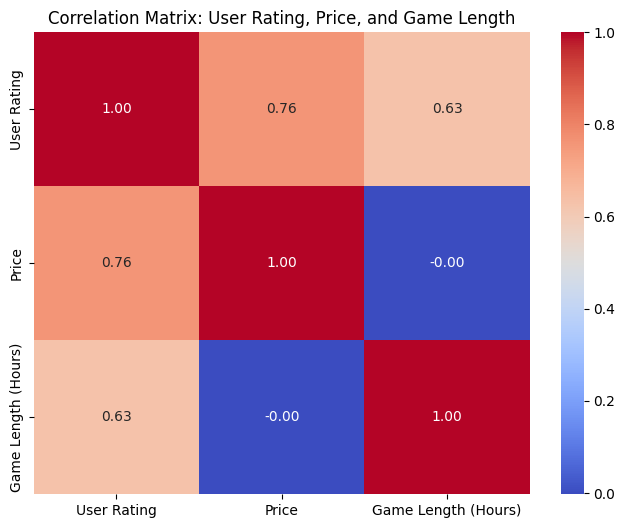

In [70]:
# Select relevant numerical columns
correlation_data = reviews[['User Rating', 'Price', 'Game Length (Hours)']]

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: User Rating, Price, and Game Length")
plt.show()

#### Visualize scatter plot with Price vs User Rating with using size and color by Game Length (Hours)

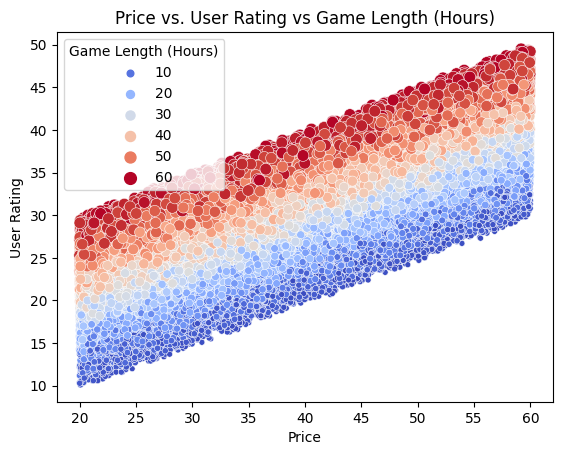

In [71]:
sns.scatterplot(data=reviews, x='Price', y='User Rating', size='Game Length (Hours)', hue='Game Length (Hours)', palette='coolwarm')
plt.title("Price vs. User Rating vs Game Length (Hours)")
plt.show()

**At result**
- Expensive video games taking to walkthrough the game is more hours than cheaper video games.
- Video games with higher ratings cost expensive than games with lower rating
- Games with higher ratings taking to walkthrough the game is more hours than video games with lower ratings.

### Are there any significant differences in user ratings for games released on different platforms (PC vs. Console vs. Mobile) per year?

#### Visualize the line plot Platform vs User Rating per Release Year

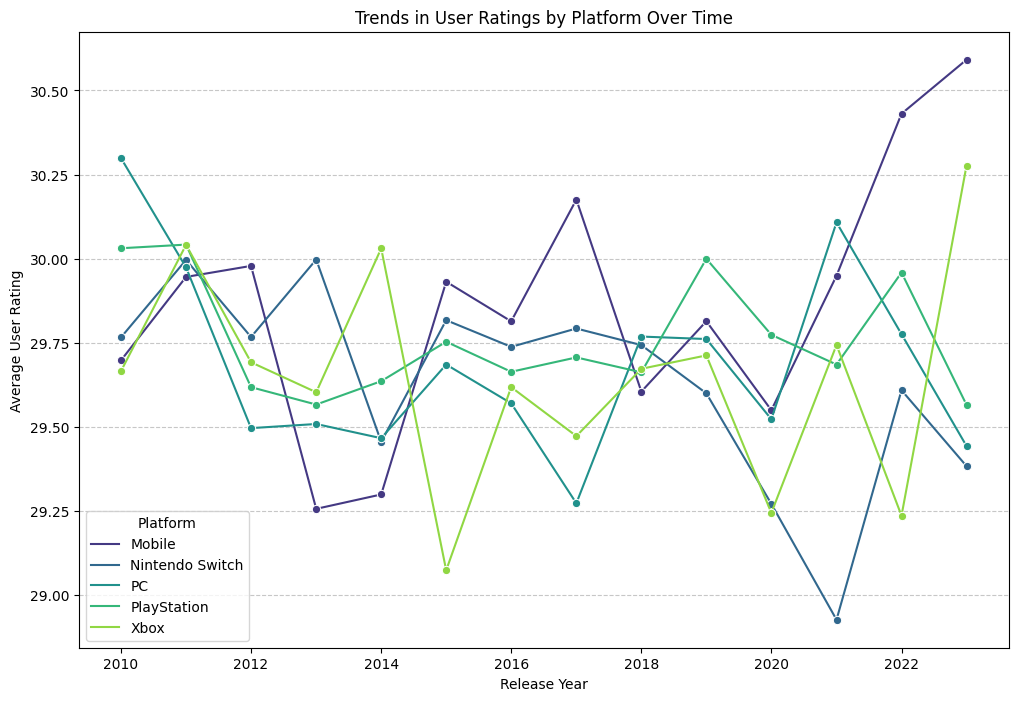

In [72]:
# Step 1: Aggregate data by Release Year, Platform, and optionally Age Group
aggregated_data = (
    reviews.groupby(['Release Year', 'Platform'])['User Rating']
    .mean()
    .reset_index()
)

# Step 2: Plot the data
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=aggregated_data,
    x='Release Year',
    y='User Rating',
    hue='Platform',
    marker='o',  # Add markers for emphasis
    palette='viridis'
)

# Step 3: Add title and labels
plt.title("Trends in User Ratings by Platform Over Time")
plt.xlabel("Release Year")
plt.ylabel("Average User Rating")
plt.legend(title="Platform")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**At result:**

* Platform ratings are changing per year that some platform increasing rating and other platforms are decreasing rating.
- Platform with highest rating in 2010 is PC. On other hand, platform fith lowest rating in 2010 is Xbox.
- Platform with highest rating in 2014 is Xbox. On other hand, platform fith lowest rating in 2014 is Mobile.
- Platform with highest rating in 2017 is Mobile. On other hand, platform fith lowest rating in 2017 is PC.
- Platform with highest rating in 2021 is PC. On other hand, platform fith lowest rating in 2021 is Nintendo Switch.
- Platform with highest rating in 2023 is Mobile. On other hand, platform fith lowest rating in 2023 is Nintendo Switch.


* It seems that mobile games got higher rating, because games for mobile device that using more in recent years become more popular.

### Can we identify any patterns in user reviews based on the age group the game is targeted towards?

#### Visualize bar plot that displaying Sentiment Distriubtion by Age Group

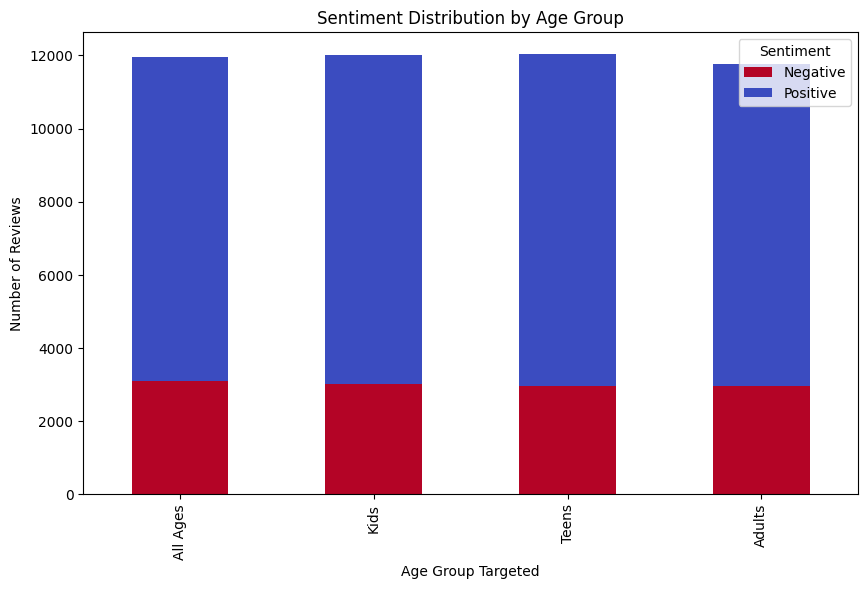

In [73]:
from textblob import TextBlob

# Function to classify sentiment
def get_sentiment(review):
    analysis = TextBlob(review)
    return 'Positive' if analysis.sentiment.polarity > 0 else ('Negative' if analysis.sentiment.polarity < 0 else 'Neutral')

# Apply sentiment analysis
reviews['Sentiment'] = reviews['User Review Text'].apply(get_sentiment)

# Visualize sentiment distribution by age group
sentiment_age = reviews.groupby(['Age Group Targeted', 'Sentiment']).size().unstack()
sentiment_age.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm_r')
plt.title("Sentiment Distribution by Age Group")
plt.xlabel("Age Group Targeted")
plt.ylabel("Number of Reviews")
plt.show()

**At result:**
- It seems that 1/4 of reviewers of games of each age group targeted are from different age group.
- It seems that 1/4 of reviewers feel that games that age group targeted are not necessarily appropriate for an age group.
- Most of reviews of video games are reviewers from same age group.

### How does the sentiment of user reviews (positive, negative, neutral) differ across different game genres?

#### Visualize bar plot that displaying Sentiment analysis across genres

<Figure size 1200x800 with 0 Axes>

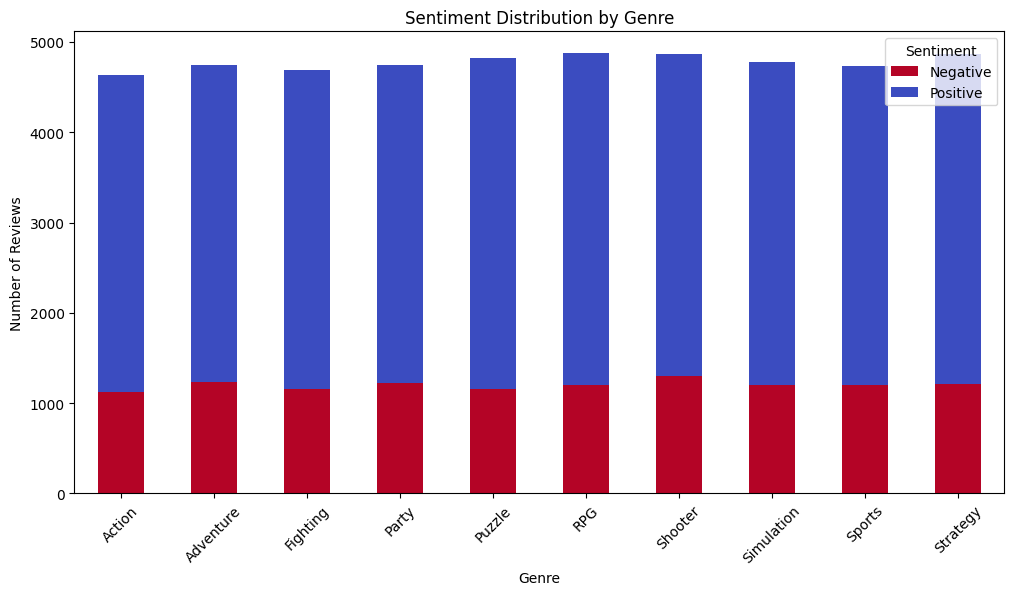

In [74]:
# Sentiment distribution by genre
sentiment_genre = reviews.groupby(['Genre', 'Sentiment']).size().unstack()

# Plot
plt.figure(figsize=(12, 8))
sentiment_genre.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm_r')
plt.title("Sentiment Distribution by Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

**At result:**
- It seems that 1/4 of reviewers of video games of each genre dissapointed by game experiences in game.
- It seems that most of reviewes of video games of each genre more liked to review their genre.
- Every reviewer have different ratings in every video games.

## Conslusion

In my data analysis, we can understand that next data things:
* We can see 47774 reviews of the video games
* We can see 40 reviewed games from last decades
* We can see 10 genres: "Action", "Adventure", "Fighting", "Party", "Puzzle", "RPG", "Shooter", "Simulation", "Sports" and "Strategy"
* We can see 5 game platforms: "Xbox", "PlayStation", "PC", "Nintendo Switch" and "Mobile"
* We can see 4 age groups categories: "All ages", "Kids", "Teens", "Adults".

In addition, we can see analysis conclusion:
* Average price of the video games is 40 USD, minimal price of the video games is 20 USD, maximal price of the video games is 60 USD.
* Average rating of the video games is 30, minimal rating of the video games is 10, maximal rating of the video games is 50.
* TOP-5 popular games are 'Pokemon Skarlet & Violet', 'Minecraft', 'FIFA 24', 'Street Fighter V' and 'Tomb Raider (2013)'
* TOP-5 popular genres are RPG, Shooter, Strategy, Puzzle and Simulation.
* TOP-5 popular platforms are PlayStation, PC, Nintendo Switch, Mobile and Xbox.
* Most reviewed genre in recent years is Strategy. Least reviewed genres in recent years are Sports and RPG.
* Most reviewed platform in recent years is PlayStation. Least reviewed platform in recent years is Xbox.
* Most reviewed age group in recent years is Kids. Least reviewed age group in recent years is Adults.

In addition, we can see advanced analysis conclusion:
* Expensive video games taking to walkthrough the game is more hours than cheaper video games.
* Video games with higher ratings cost expensive than games with lower rating
* Games with higher ratings taking to walkthrough the game is more hours than video games with lower ratings.
* Platform ratings are changing per year that some platform increasing rating and other platforms are decreasing rating.
* It seems that mobile games got higher rating, because games for mobile device that using more in recent years become more popular.
* It seems that 1/4 of reviewers of games of each age group targeted are from different age group and also feel that games that age group targeted are not necessarily appropriate for an age group.
* It seems that 1/4 of reviewers of video games of each genre dissapointed by game experiences in game.
* It seems that most of reviewes of video games of each genre more liked to review their genre.
* Every reviewer have different ratings in every video games.